In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform



In [2]:
train_Target = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/ICAd15_schfd100/ConvTransformer/train_ground_truth.npy")
test_Target = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/ICAd15_schfd100/ConvTransformer/test_ground_truth.npy")


In [3]:
pca = PCA(n_components=1000)

pca.fit(train_Target)

PCA(n_components=1000)

In [4]:
train_transform = pca.transform(train_Target)
train_pred = pca.inverse_transform(train_transform)

test_transform = pca.transform(test_Target)
test_pred = pca.inverse_transform(test_transform)

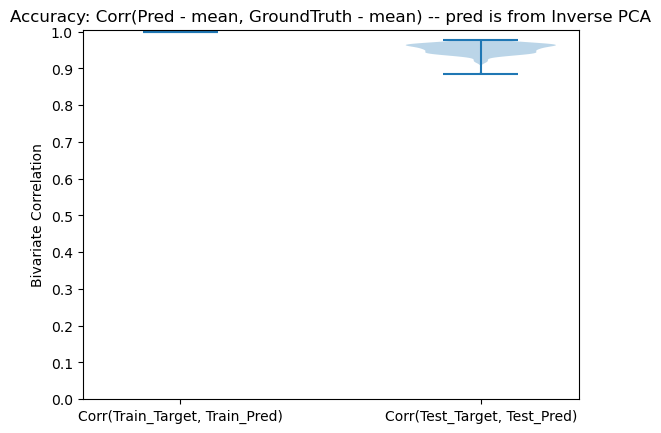

In [5]:
test_mean = np.mean(test_Target, axis=0)
train_mean = np.mean(train_Target, axis=0)


test_corrs = []
for i in range(test_Target.shape[0]):
    corr = np.corrcoef(test_Target[i, :] - test_mean, test_pred[i, :] - test_mean)
    test_corrs.append(corr[0,1])

train_corrs = []
for i in range(train_Target.shape[0]):
    corr = np.corrcoef(train_Target[i, :] - train_mean, train_pred[i, :] - train_mean)
    train_corrs.append(corr[0,1])
'''

test_corrs = []
for i in range(test_Target.shape[0]):
    corr = np.corrcoef(test_Target[i, :], test_pred[i, :])
    test_corrs.append(corr[0,1])

train_corrs = []
for i in range(train_Target.shape[0]):
    corr = np.corrcoef(train_Target[i, :], train_pred[i, :])
    train_corrs.append(corr[0,1])
'''

plt.violinplot([train_corrs, test_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Pred)', 'Corr(Test_Target, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.title("Accuracy: Corr(Pred - mean, GroundTruth - mean) -- pred is from Inverse PCA")
plt.show()

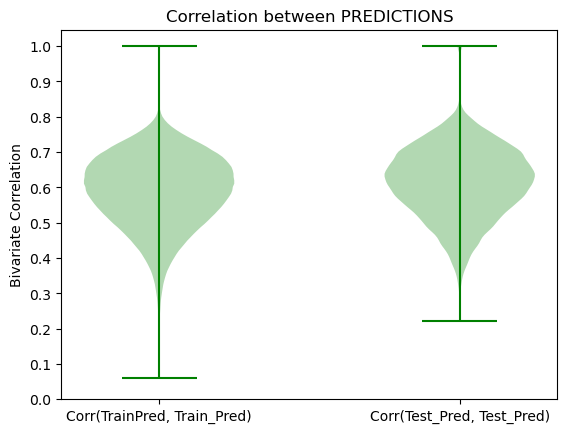

In [6]:
corr = np.corrcoef(train_pred)
traintrain_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_preds, test_preds)
corr = np.corrcoef(test_pred)
testtest_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

violin = plt.violinplot([traintrain_pred_corrs, testtest_pred_corrs])
for pc in violin['bodies']:
    pc.set_facecolor("green")
    
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor('green')


plt.xticks([1, 2], ['Corr(TrainPred, Train_Pred)', 'Corr(Test_Pred, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.title("Correlation between PREDICTIONS")
plt.show()

In [18]:
def make_netmat(data, netmat_dim=100):
    '''
    Makes netmat from upper triangle in numpy
    '''
    sing_sub = int((netmat_dim * (netmat_dim-1))/2)

    # get indeces of upptri cause all these vec netmats are upper trinagles. 
    out_mat_init = np.ones(2*sing_sub+netmat_dim).reshape(netmat_dim,netmat_dim)

    inds_uptri = np.triu_indices_from(out_mat_init,k=1) # k=1 means no diagonal?
    inds_lowtri = np.tril_indices_from(out_mat_init,k=-1) # k=1 means no diagonal?
   
    out_mat_val = out_mat_init
    out_mat_val[inds_lowtri] = data
    out_mat_init[inds_uptri] = out_mat_init.T[inds_uptri]

    return out_mat_init

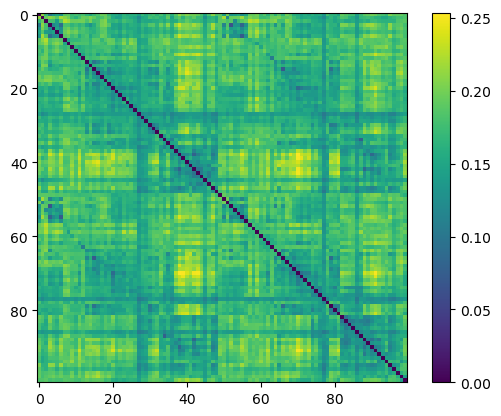

In [36]:
var = np.std(train_Target, axis=0)
plt.imshow(make_netmat(var) - np.identity(100))
plt.colorbar()

Mean distance: 0.17342943111329798


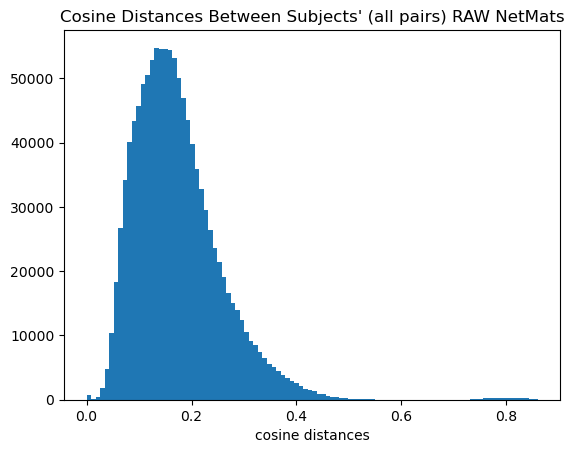

In [87]:
distances = pdist(train_Target, metric='cosine')

print(f"Mean distance: {np.mean(distances)}")
plt.hist(distances, bins=100)
plt.title("Cosine Distances Between Subjects' (all pairs) RAW NetMats")
plt.xlabel("cosine distances")
plt.show()


Mean distance: 0.9992122041558352


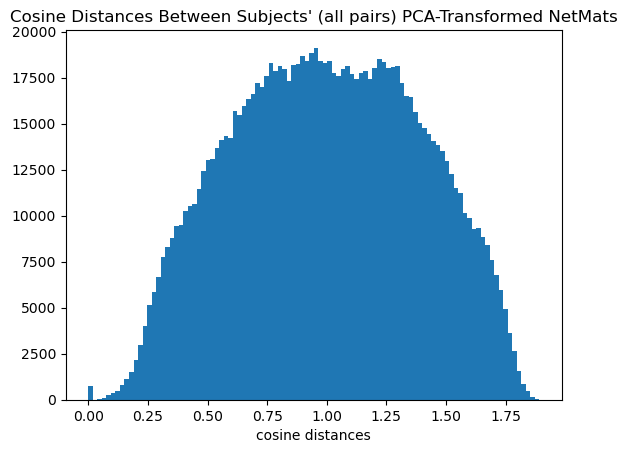

In [88]:
distances = pdist(train_transform, metric='cosine')

print(f"Mean distance: {np.mean(distances)}")
plt.hist(distances, bins=100)
plt.title("Cosine Distances Between Subjects' (all pairs) PCA-Transformed NetMats")
plt.xlabel("cosine distances")
plt.show()


In [79]:
train_transform.shape


(1524, 1000)